### Decision Tree(Classifier+Regressor)

In [1]:
# Id 3==Best attribute
#Entropy E=-Sum p(x)log p(x)
#Information Gain Ig=E(parient)-weighted avg*e(children)

In [2]:
import pandas as pd
d=[[12,13,'dog'],[13,34,'cat'],[24,34,'cat'],[45,21,'dog']]
df=pd.DataFrame(d,columns=['Height',"width","pet"])
df

,Height,width,pet
0,12,13,dog
1,13,34,cat
2,24,34,cat
3,45,21,dog


In [3]:
#split data
x=df.drop('pet',axis=1)
x

,Height,width
0,12,13
1,13,34
2,24,34
3,45,21


In [4]:
y=df["pet"]
y

0    dog
1    cat
2    cat
3    dog
Name: pet, dtype: object

In [5]:
from sklearn.tree import DecisionTreeClassifier

In [6]:
clf=DecisionTreeClassifier()

In [7]:
clf.fit(x,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [8]:
clf.predict([[24,34]])

array(['cat'], dtype=object)

In [9]:
#graphviz -->dot
#pydotplus--dot file into image

In [10]:
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image

C:\Users\kvsw\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


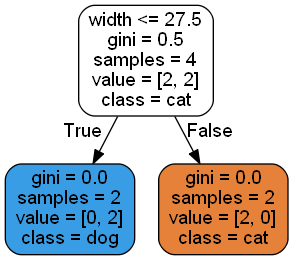

In [11]:
d1=StringIO()
export_graphviz(clf,out_file=d1,
                filled = True,rounded = True,
                feature_names = x.columns,
                class_names=["cat","dog"])
graph = pydotplus.graph_from_dot_data(d1.getvalue())
Image(graph.create_png())

In [12]:
zoo=pd.read_csv("zoo.csv")
zoo.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [13]:
zoo["class_type"].unique()

array([1, 4, 2, 7, 6, 5, 3], dtype=int64)

In [14]:
animalname=pd.read_csv("class.csv")
animalname.tail()

,Class_Number,Number_Of_Animal_Species_In_Class,Class_Type,Animal_Names
2,3,5,Reptile,"pitviper, seasnake, slowworm, tortoise, tuatara"
3,4,13,Fish,"bass, carp, catfish, chub, dogfish, haddock, h..."
4,5,4,Amphibian,"frog, frog, newt, toad"
5,6,8,Bug,"flea, gnat, honeybee, housefly, ladybird, moth..."
6,7,10,Invertebrate,"clam, crab, crayfish, lobster, octopus, scorpi..."


In [18]:
animal_df=pd.merge(zoo,animalname,how = 'left',
                   left_on ='class_type',
              right_on = 'Class_Number')

In [19]:
animal_df

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,...,fins,legs,tail,domestic,catsize,class_type,Class_Number,Number_Of_Animal_Species_In_Class,Class_Type,Animal_Names
0,aardvark,1,0,0,1,0,0,1,1,1,...,0,4,0,0,1,1,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
1,antelope,1,0,0,1,0,0,0,1,1,...,0,4,1,0,1,1,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
2,bass,0,0,1,0,0,1,1,1,1,...,1,0,1,0,0,4,4,13,Fish,"bass, carp, catfish, chub, dogfish, haddock, h..."
3,bear,1,0,0,1,0,0,1,1,1,...,0,4,0,0,1,1,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
4,boar,1,0,0,1,0,0,1,1,1,...,0,4,1,0,1,1,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
5,buffalo,1,0,0,1,0,0,0,1,1,...,0,4,1,0,1,1,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
6,calf,1,0,0,1,0,0,0,1,1,...,0,4,1,1,1,1,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
7,carp,0,0,1,0,0,1,0,1,1,...,1,0,1,1,0,4,4,13,Fish,"bass, carp, catfish, chub, dogfish, haddock, h..."
8,catfish,0,0,1,0,0,1,1,1,1,...,1,0,1,0,0,4,4,13,Fish,"bass, carp, catfish, chub, dogfish, haddock, h..."
9,cavy,1,0,0,1,0,0,0,1,1,...,0,4,0,1,0,1,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
